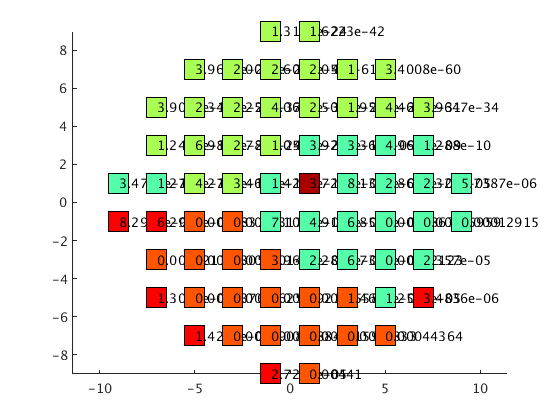

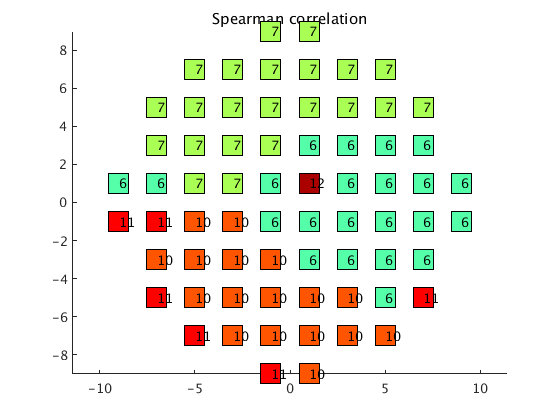

In [4]:
%function STEPWISE

% CH = readtable(fullfile(pwd,'df_20171002_Turpin.xls'),'Sheet','CH');
% HFA = readtable(fullfile(pwd,'df_20171002_Turpin.xls'),'Sheet','HFA');

%% load data
[theMessage, description, format] = xlsfinfo(fullfile(pwd,'df_20171002_Turpin.xlsx'));

CH = xlsread(fullfile(pwd,'df_20171002_Turpin.xlsx'),3);
HFA = xlsread(fullfile(pwd,'df_20171002_Turpin.xlsx'), 4);

%%  load 10-2 test point
% tp = xlsread(fullfile(pwd, '10-2testpoint.xlsx'));
tp = readtable(fullfile(pwd, '10-2testpoint.xlsx'));

%% Spearman

[R ,P] = corrcoef([HFA,CH]); 


SF =  R(1:68,69:80);
sf = zeros(size(SF));
pp = zeros(size(SF));


p = P(1:68,69:80);

% for ii = 1:12
%     sf(:,ii)= SF(:,ii)==max(SF(:,ii));
% end

for ii = 1:68
    sf(ii,:)= SF(ii,:)==max(SF(ii,:));
    pp(ii,:)= p(ii,:)==min(p(ii,:));
end

%% 
c= jet(12);
figure; 
% subplot(1,2,1); 
hold on;

for ii =1 : size(HFA,2)
    if isempty(find(sf(ii,:),1));
        plot(tp.x(ii), tp.y(ii), 's',...
            'MarkerFaceColor','none','MarkerEdgeColor',[0 0 0],...
            'MarkerSize',20)
    else
        plot(tp.x(ii), tp.y(ii), 's',...
            'MarkerFaceColor',c(find(sf(ii,:),1),:),'MarkerEdgeColor',[0 0 0],...
            'MarkerSize',20)
        text(tp.x(ii), tp.y(ii),num2str(find(sf(ii,:),1)))
    end
end
axis equal
names = 1:12;
names = num2str(names);
title 'Spearman correlation'

figure; 
% subplot(1,2,1); 
hold on;

for ii =1 : size(HFA,2)
    if isempty(find(sf(ii,:),1));
        plot(tp.x(ii), tp.y(ii), 's',...
            'MarkerFaceColor','none','MarkerEdgeColor',[0 0 0],...
            'MarkerSize',20)
    else
        plot(tp.x(ii), tp.y(ii), 's',...
            'MarkerFaceColor',c(find(sf(ii,:),1),:),'MarkerEdgeColor',[0 0 0],...
            'MarkerSize',20)
        text(tp.x(ii), tp.y(ii), num2str(P(ii,find(pp(ii,:),1))))
    end
end
axis equal
names = 1:12;
names = num2str(names);


含まれる最初の列:  none
ステップ 1、追加した列 1、p=9.07092e-06
ステップ 2、追加した列 64、p=0.0426684
ステップ 3、追加した列 62、p=0.0265369
ステップ 4、追加した列 16、p=0.035477
ステップ 5、追加した列 29、p=0.00638185
ステップ 6、追加した列 38、p=0.0139353
ステップ 7、追加した列 57、p=0.0385701
ステップ 8、追加した列 63、p=0.023269
ステップ 9、追加した列 10、p=0.0317039
ステップ 10、削除した列 1、p=0.133303
含まれる最後の列:   10 16 29 38 57 62 63 64 
    '係数'       '標準誤差'    '状態'     'P'         
    [ 0.2946]    [ 0.1949]    'アウト'    [    0.1333]
    [ 0.2323]    [ 0.2025]    'アウト'    [    0.2536]
    [ 0.1111]    [ 0.2070]    'アウト'    [    0.5925]
    [ 0.2156]    [ 0.2690]    'アウト'    [    0.4245]
    [-0.0700]    [ 0.2547]    'アウト'    [    0.7839]
    [ 0.1704]    [ 0.2286]    'アウト'    [    0.4573]
    [ 0.2001]    [ 0.2175]    'アウト'    [    0.3594]
    [ 0.1666]    [ 0.2135]    'アウト'    [    0.4366]
    [-0.0123]    [ 0.2123]    'アウト'    [    0.9538]
    [ 0.6435]    [ 0.1299]    'イン'     [2.3653e-06]
    [-0.2785]    [ 0.2636]    'アウト'    [    0.2928]
    [ 0.0795]    [ 0.2160]    'アウト'    [    0.713

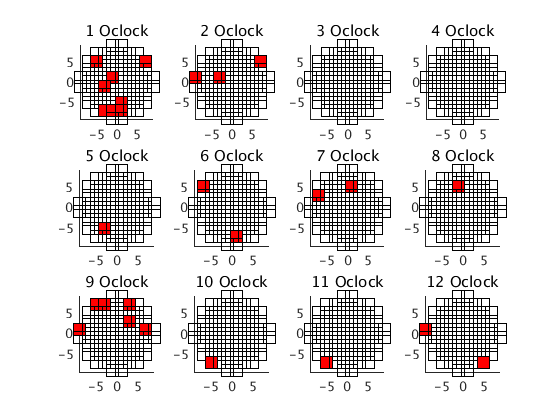

In [5]:
%% stepwise
figure;
for ii = 1:12
    [b,se,pval,inmodel,stats,nextstep,history] = stepwisefit(HFA,CH(:, ii),...
        'penter',0.05,'premove',0.10);
    
    subplot(3,4,ii);
    hold on;
    for jj =1 : size(HFA,2)
        if inmodel(jj)==1
            plot(tp.x(jj), tp.y(jj), 's',...
                'MarkerFaceColor','r','MarkerEdgeColor',[0 0 0],... %c(gr(ii),:),...
                'MarkerSize',12)
        else
            plot(tp.x(jj), tp.y(jj), 's',...
                'MarkerFaceColor','none','MarkerEdgeColor',[0 0 0],... %c(gr(ii),:),...
                'MarkerSize',12)
        end
    end
    hold off;
    set(gca,'YLim', get(gca, 'XLim'))
    axis equal
    title(sprintf('%d Oclock',ii))
end


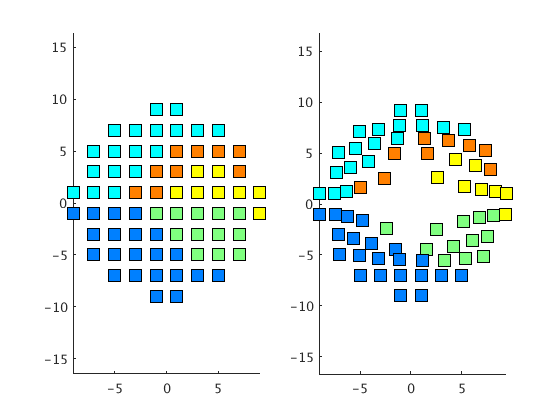

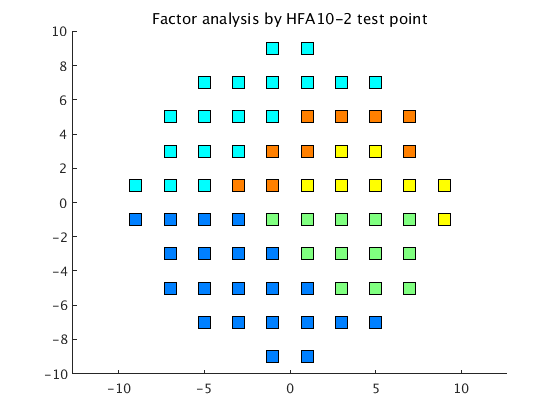

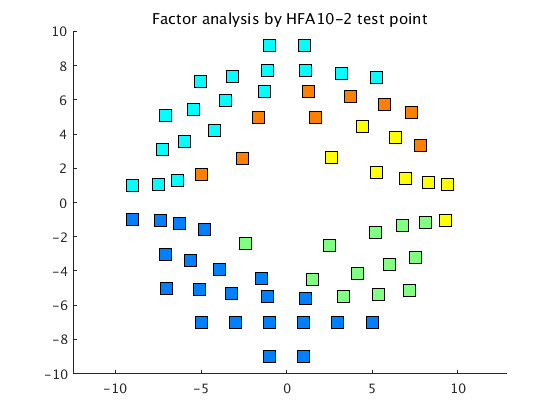

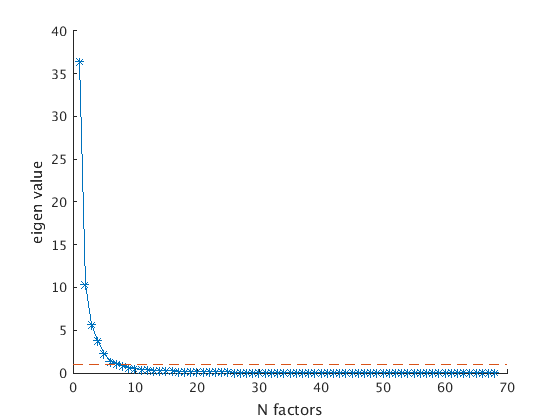

In [6]:
%% Factor analysis
% load examgrades
% [Loadings1,specVar1,T,stats] = factoran(grades,1);

%% eigen value

% e = eig(corr(HFA));
e = eig(corr(HFA));

figure; hold on;
plot(e,'-*')
plot([0,70],[1,1],'--')
xlabel 'N factors'
ylabel 'eigen value'

nFact= sum(e> 1);
nGr = nFact-1;

[Loadings1,specVar1,T,stats] = factoran(HFA, nGr);

LC =Loadings1;

%%
% Sigma = cov(HFA);
%
% e = eig(Sigma);
%
% figure; hold on;
% plot(flip(e),'-*')
% plot([0,70],[1,1],'--')
% xlabel 'N factors'
% ylabel 'eigen value'
%
% [LoadingsCov,specVarCov] = ...
%         factoran(Sigma,nFact-1,'Xtype','cov','rotate','none');
% LC = LoadingsCov

%% devide all into groups
gr = zeros(size(HFA,2),1);
for ii =1 : size(HFA,2)
    gr(ii)= find( LC(ii,:)==max(LC(ii,:))) ;
end


%% by color
c = jet(max(gr));
figure;hold on;
for ii =1 : size(HFA,2)
    plot(tp.turpin_disp_x(ii), tp.turpin_disp_y(ii), 's',...
        'MarkerFaceColor',c(gr(ii),:),'MarkerEdgeColor',[0 0 0],...
        'MarkerSize',12)
end
set(gca,'YLim', get(gca, 'XLim'))
axis equal
title 'Factor analysis by HFA10-2 test point'

figure;hold on;
for ii =1 : size(HFA,2)
    plot(tp.x(ii), tp.y(ii), 's',...
        'MarkerFaceColor',c(gr(ii),:),'MarkerEdgeColor',[0 0 0],...
        'MarkerSize',12)
end
set(gca,'YLim', get(gca, 'XLim'))
axis equal
title 'Factor analysis by HFA10-2 test point'

%%
c = jet(max(gr));
figure
subplot(1,2,1);hold on;
for ii =1 : size(HFA,2)
    plot(tp.x(ii), tp.y(ii), 's',...
        'MarkerFaceColor',c(gr(ii),:),'MarkerEdgeColor',[0 0 0],... %c(gr(ii),:),...
        'MarkerSize',12)
end
set(gca,'YLim', get(gca, 'XLim'))
axis equal

hold off;

subplot(1,2,2); hold on;
for ii =1 : size(HFA,2)
    plot(tp.turpin_disp_x(ii), tp.turpin_disp_y(ii), 's',...
        'MarkerFaceColor',c(gr(ii),:),'MarkerEdgeColor', [0 0 0],... %c(gr(ii),:),...
        'MarkerSize',12)
end
set(gca,'YLim', get(gca, 'XLim'))
axis equal



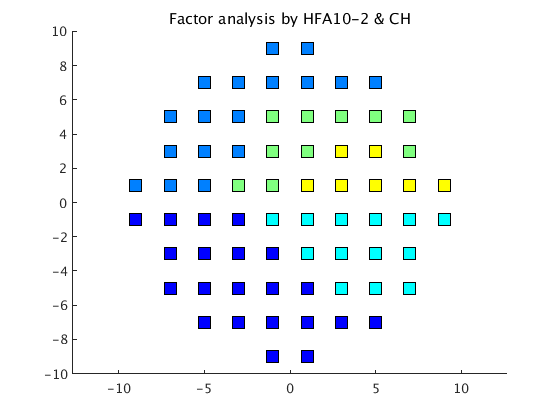

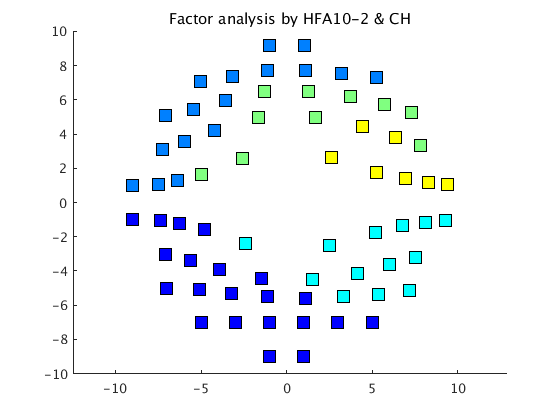

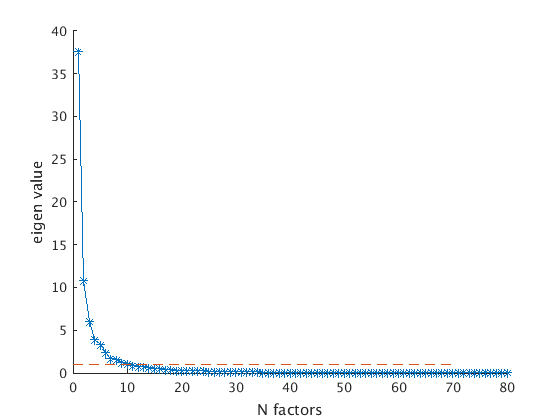

In [7]:
%% Factor analysis
%% HFA & CH 
% eigen value

% e = eig(corr(HFA));
e = eig(corr([HFA,CH]));

figure; hold on;
plot(e,'-*')
plot([0,70],[1,1],'--')
xlabel 'N factors'
ylabel 'eigen value'

nFact= sum(e> 1);
nGr = nFact-1;

[Loadings1,specVar1,T,stats] = factoran([HFA,CH], nGr);

LC =Loadings1;
%% devide all into groups
gr = zeros(size([HFA,CH],2),1);
for ii =1 : size([HFA,CH],2)
    gr(ii)= find( LC(ii,:)==max(LC(ii,:))) ;
end

%%
c = jet(max(gr));
figure;
% subplot(1,2,1)
hold on;
for ii =1 : size(HFA,2)
    plot(tp.turpin_disp_x(ii), tp.turpin_disp_y(ii), 's',...
        'MarkerFaceColor',c(gr(ii),:),'MarkerEdgeColor',[0 0 0],...
        'MarkerSize',12)
end
set(gca,'YLim', get(gca, 'XLim'))
axis equal
title 'Factor analysis by HFA10-2 & CH'


figure;
% subplot(1,2,2)
hold on;
for ii =1 : size(HFA,2)
    plot(tp.x(ii), tp.y(ii), 's',...
        'MarkerFaceColor',c(gr(ii),:),'MarkerEdgeColor', [0 0 0],... %c(gr(ii),:),...
        'MarkerSize',12)
end
set(gca,'YLim', get(gca, 'XLim'))
axis equal
title 'Factor analysis by HFA10-2 & CH'


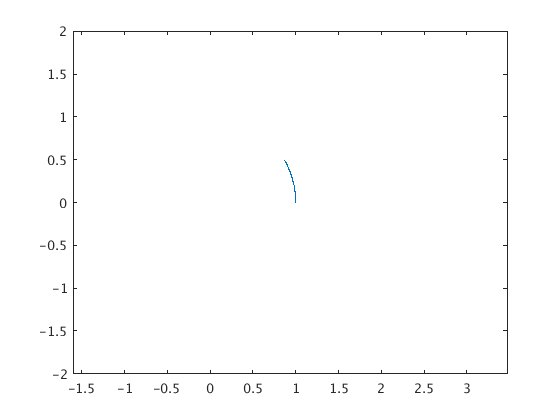

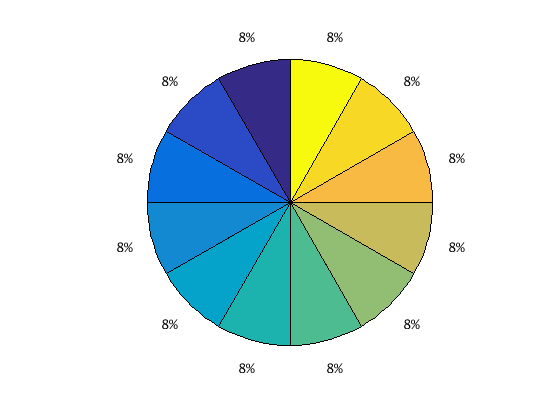

In [9]:
%%

figure;
pie(ones(12,1))

% 等間隔ベクトルの作成
% t = linspace(0,2*pi,100);
t = linspace(0,pi/6,100); % pi = 180


figure
% fill(sin(t),cos(t),c(1,:))
plot(cos(t),sin(t))

axis([-2,2,-2,2])
axis equal

